In [1]:
import sys
print(sys.version)


3.11.9 (tags/v3.11.9:de54cf5, Apr  2 2024, 10:12:12) [MSC v.1938 64 bit (AMD64)]


In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
 Formula 1 Race Winners Analysis (1950–2025)


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [5]:
df = pd.read_csv("winners_f1_1950_2025_v2.csv")
df.head()


,date,continent,grand_prix,circuit,winner_name,team,time,laps,year
0,1950-05-13,Europe,Great Britain,Silverstone Circuit,Nino Farina,Alfa Romeo,02:13:23,70.0,1950
1,1950-05-21,Europe,Monaco,Circuit de Monaco,Juan Manuel Fangio,Alfa Romeo,03:13:18,100.0,1950
2,1950-05-30,North America,United States,Indianapolis Motor Speedway,Johnnie Parsons,Kurtis Kraft Offenhauser,02:46:55,138.0,1950
3,1950-06-04,Europe,Switzerland,Circuit Bremgarten,Nino Farina,Alfa Romeo,02:02:53,42.0,1950
4,1950-06-18,Europe,Belgium,Circuit de Spa Francorchamps,Juan Manuel Fangio,Alfa Romeo,02:47:26,35.0,1950


In [6]:
df.shape


(1142, 9)

In [7]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1142 entries, 0 to 1141
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1142 non-null   str    
 1   continent    1142 non-null   str    
 2   grand_prix   1142 non-null   str    
 3   circuit      1142 non-null   str    
 4   winner_name  1142 non-null   str    
 5   team         1142 non-null   str    
 6   time         1142 non-null   str    
 7   laps         1142 non-null   float64
 8   year         1142 non-null   int64  
dtypes: float64(1), int64(1), str(7)
memory usage: 80.4 KB


In [8]:
df.describe()

,laps,year
count,1142.000000,1142.000000
mean,64.617338,1992.999124
std,20.065139,20.850097
min,1.000000,1950.000000
25%,54.000000,1977.000000
50%,64.000000,1995.000000
75%,72.000000,2011.000000
max,200.000000,2025.000000


In [9]:
df.isnull().sum()

date           0
continent      0
grand_prix     0
circuit        0
winner_name    0
team           0
time           0
laps           0
year           0
dtype: int64

In [ ]:
Dataset Overview

- The dataset contains X rows and Y columns.
- It includes driver names, constructors, circuits, year, round, and nationality.
- Data types include both numerical and categorical features.
- Missing values were analyzed before preprocessing.


In [10]:
df.columns

Index(['date', 'continent', 'grand_prix', 'circuit', 'winner_name', 'team',
       'time', 'laps', 'year'],
      dtype='str')

In [ ]:
cleaning

In [11]:
df['year'] = df['year'].astype(int)
df['date'] = pd.to_datetime(df['date'])

In [12]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1142 entries, 0 to 1141
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1142 non-null   datetime64[us]
 1   continent    1142 non-null   str           
 2   grand_prix   1142 non-null   str           
 3   circuit      1142 non-null   str           
 4   winner_name  1142 non-null   str           
 5   team         1142 non-null   str           
 6   time         1142 non-null   str           
 7   laps         1142 non-null   float64       
 8   year         1142 non-null   int64         
dtypes: datetime64[us](1), float64(1), int64(1), str(6)
memory usage: 80.4 KB


In [ ]:
Missing values

In [13]:
df.isnull().sum()

date           0
continent      0
grand_prix     0
circuit        0
winner_name    0
team           0
time           0
laps           0
year           0
dtype: int64

In [14]:
df = df.dropna()

In [ ]:
Remove duplicates

In [16]:
df = df.drop_duplicates()

In [ ]:
Create Derived Columns

In [17]:
df['decade'] = (df['year'] // 10) * 10
df.head()

,date,continent,grand_prix,circuit,winner_name,team,time,laps,year,decade
0,1950-05-13,Europe,Great Britain,Silverstone Circuit,Nino Farina,Alfa Romeo,02:13:23,70.0,1950,1950
1,1950-05-21,Europe,Monaco,Circuit de Monaco,Juan Manuel Fangio,Alfa Romeo,03:13:18,100.0,1950,1950
2,1950-05-30,North America,United States,Indianapolis Motor Speedway,Johnnie Parsons,Kurtis Kraft Offenhauser,02:46:55,138.0,1950,1950
3,1950-06-04,Europe,Switzerland,Circuit Bremgarten,Nino Farina,Alfa Romeo,02:02:53,42.0,1950,1950
4,1950-06-18,Europe,Belgium,Circuit de Spa Francorchamps,Juan Manuel Fangio,Alfa Romeo,02:47:26,35.0,1950,1950


In [ ]:
Cleaning explanation
- Converted 'year' column to integer type.
- Converted 'date' column to datetime format.
- Removed duplicate records.
- Handled missing values.
- Created a new 'decade' column for decade-based analysis.


In [ ]:
VISUALIZATION

In [ ]:
Visualization 1-Top 10 Drivers by Wins

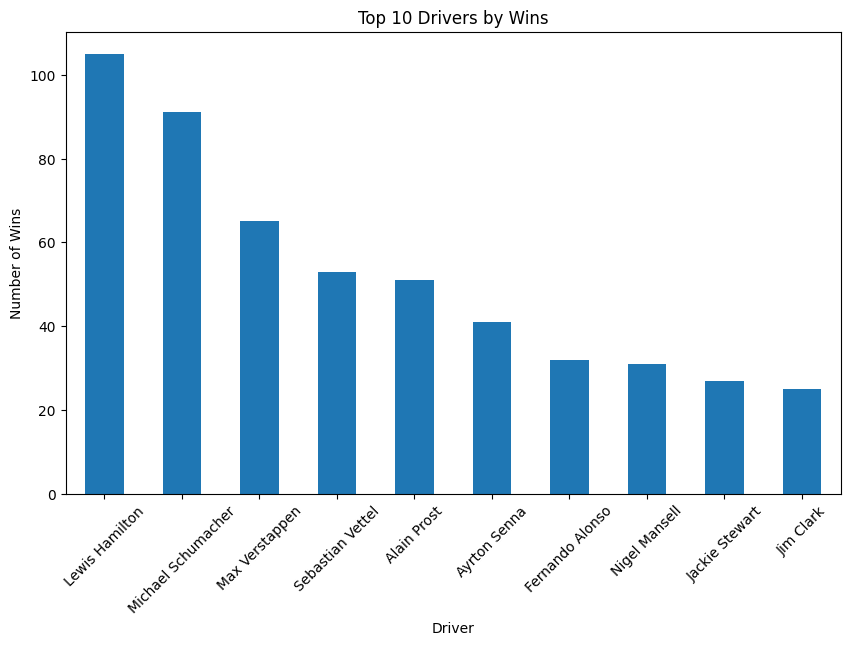

In [18]:
top_drivers = df['winner_name'].value_counts().head(10)

plt.figure(figsize=(10,6))
top_drivers.plot(kind='bar')
plt.title("Top 10 Drivers by Wins")
plt.xlabel("Driver")
plt.ylabel("Number of Wins")
plt.xticks(rotation=45)
plt.show()

In [ ]:
Visualization 2 — Top Teams

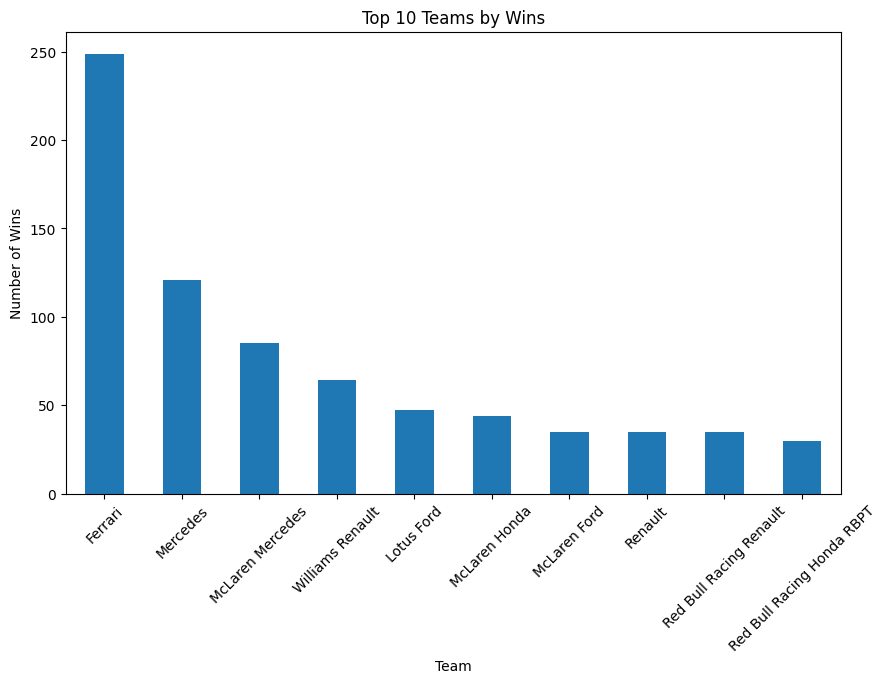

In [19]:
top_teams = df['team'].value_counts().head(10)

plt.figure(figsize=(10,6))
top_teams.plot(kind='bar')
plt.title("Top 10 Teams by Wins")
plt.xlabel("Team")
plt.ylabel("Number of Wins")
plt.xticks(rotation=45)
plt.show()

In [ ]:
Visualization 3 — Wins Per Year

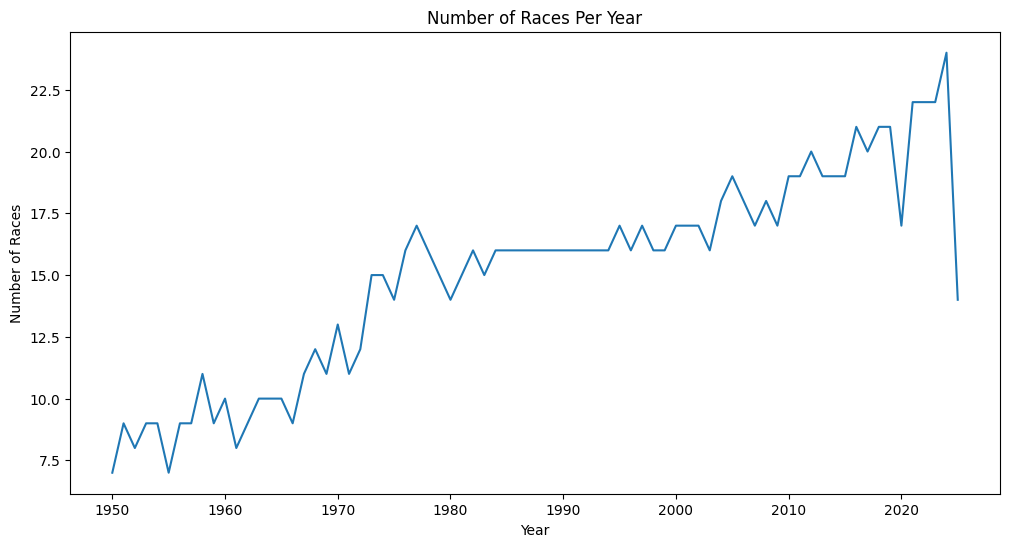

In [20]:
wins_per_year = df.groupby('year').size()

plt.figure(figsize=(12,6))
wins_per_year.plot()
plt.title("Number of Races Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Races")
plt.show()

In [21]:
df.head()

,date,continent,grand_prix,circuit,winner_name,team,time,laps,year,decade
0,1950-05-13,Europe,Great Britain,Silverstone Circuit,Nino Farina,Alfa Romeo,02:13:23,70.0,1950,1950
1,1950-05-21,Europe,Monaco,Circuit de Monaco,Juan Manuel Fangio,Alfa Romeo,03:13:18,100.0,1950,1950
2,1950-05-30,North America,United States,Indianapolis Motor Speedway,Johnnie Parsons,Kurtis Kraft Offenhauser,02:46:55,138.0,1950,1950
3,1950-06-04,Europe,Switzerland,Circuit Bremgarten,Nino Farina,Alfa Romeo,02:02:53,42.0,1950,1950
4,1950-06-18,Europe,Belgium,Circuit de Spa Francorchamps,Juan Manuel Fangio,Alfa Romeo,02:47:26,35.0,1950,1950


In [ ]:
4 Continent Analysis (Bar Chart)

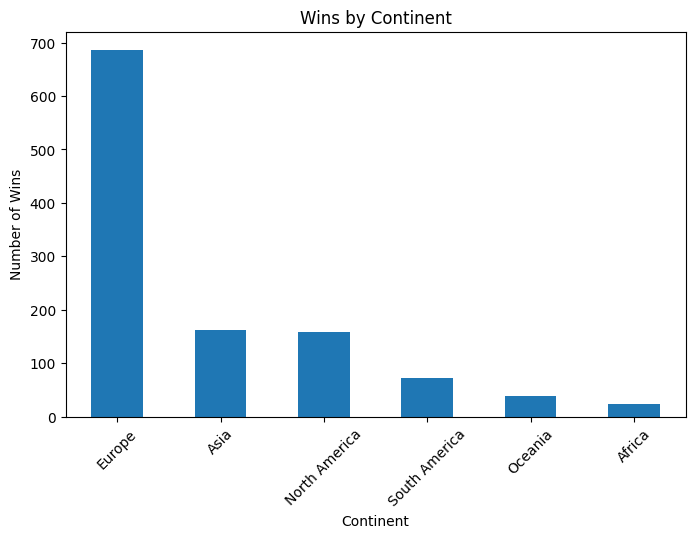

In [22]:
continent_wins = df['continent'].value_counts()

plt.figure(figsize=(8,5))
continent_wins.plot(kind='bar')
plt.title("Wins by Continent")
plt.xlabel("Continent")
plt.ylabel("Number of Wins")
plt.xticks(rotation=45)
plt.show()

In [ ]:
5 Decade Analysis

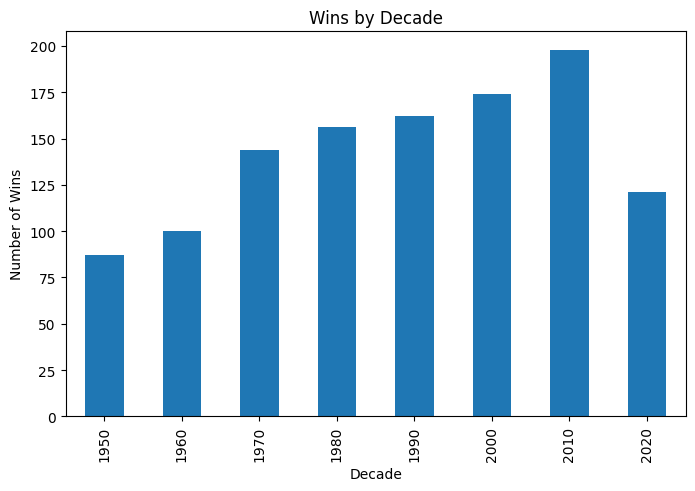

In [23]:
decade_wins = df.groupby('decade').size()

plt.figure(figsize=(8,5))
decade_wins.plot(kind='bar')
plt.title("Wins by Decade")
plt.xlabel("Decade")
plt.ylabel("Number of Wins")
plt.show()

In [ ]:
6️ Heatmap

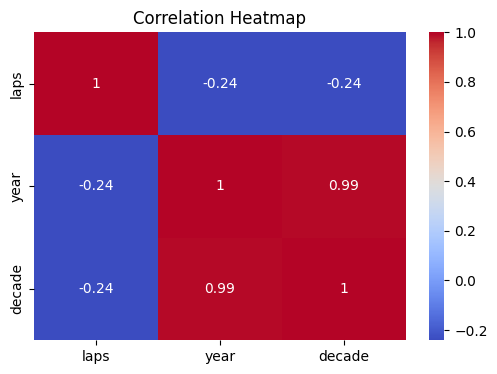

In [24]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), 
            annot=True, 
            cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
7️ Pie Chart (Team Share)

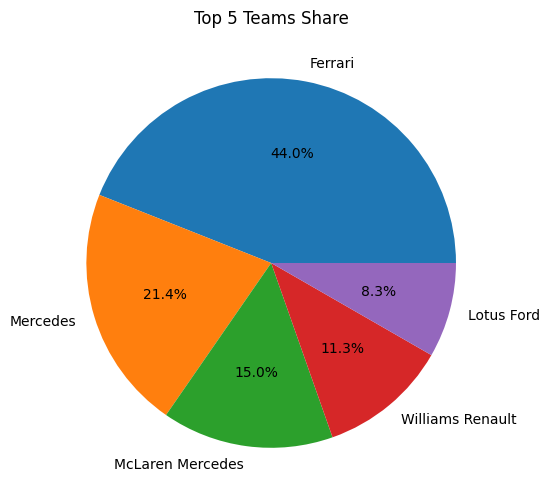

In [25]:
top5_teams = df['team'].value_counts().head(5)

plt.figure(figsize=(6,6))
plt.pie(top5_teams, 
        labels=top5_teams.index, 
        autopct='%1.1f%%')
plt.title("Top 5 Teams Share")
plt.show()

In [ ]:
8️ Scatter Plot

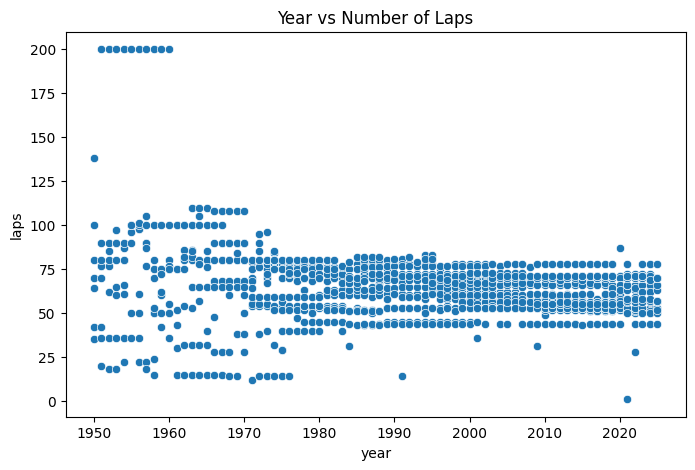

In [26]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='year', y='laps', data=df)
plt.title("Year vs Number of Laps")
plt.show()

In [ ]:
9️ Pivot Table

In [27]:
pivot_table = pd.pivot_table(
    df,
    values='winner_name',
    index='team',
    columns='decade',
    aggfunc='count'
)

pivot_table.head()

decade,1950,1960,1970,1980,1990,2000,2010,2020
team,,,,,,,,
Alfa Romeo,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AlphaTauri Honda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
Alpine Renault,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
BRM,1.0,12.0,4.0,NaN,NaN,NaN,NaN,NaN
Benetton BMW,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [ ]:
10 Grand Prix Frequency

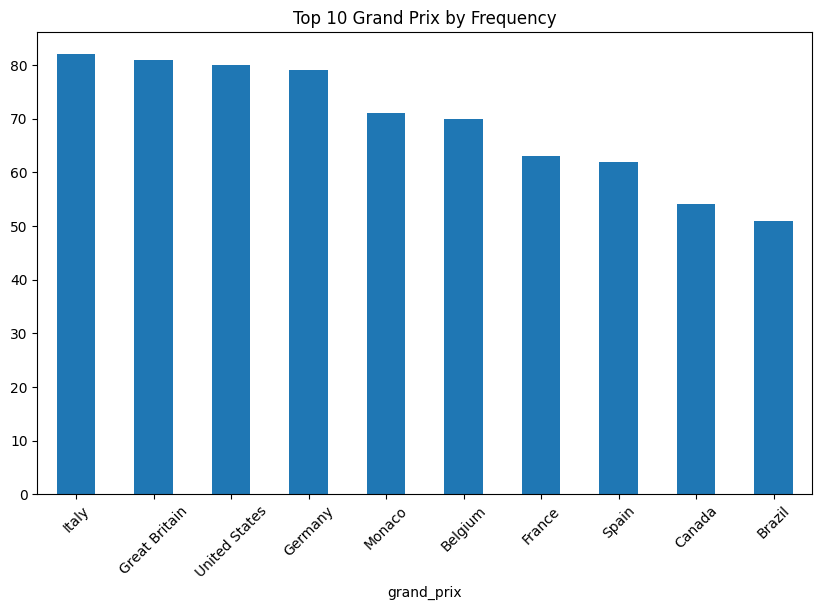

In [28]:
top_gp = df['grand_prix'].value_counts().head(10)

plt.figure(figsize=(10,6))
top_gp.plot(kind='bar')
plt.title("Top 10 Grand Prix by Frequency")
plt.xticks(rotation=45)
plt.show()

In [ ]:
INSIGHTS

In [ ]:
1. Driver Dominance Across Eras**  
   Certain drivers dominate specific periods in Formula 1 history. The top 10 drivers account for a significant proportion of total wins, showing long-term performance consistency at elite levels.

2. Team Performance Trends**  
   A small number of constructors (teams) have historically dominated Formula 1. The top 5 teams collectively contribute a major share of total race victories.

3. Increase in Race Frequency Over Time**  
   The number of races per year has increased significantly in modern decades compared to earlier years (1950s–1970s), indicating the global expansion of the sport.

4. Continental Distribution of Races**  
   Europe accounts for the highest number of races, reflecting the historical roots of Formula 1. However, other continents show growing participation in recent decades.

5. Decade-Based Competition Patterns**  
   Some decades show higher competitive balance, while others display dominance by particular teams. The pivot table analysis highlights how team success shifts across decades.

6. Correlation Between Year and Laps**  
   The correlation analysis suggests minor variation in lap counts over years, indicating relative consistency in race structure despite technological evolution.


CONCLUSION

In [ ]:
This project successfully performed end-to-end exploratory data analysis on the Formula 1 race winners dataset from 1950 to 2025. 

The analysis revealed historical dominance patterns among drivers and constructors, geographical distribution of races, evolving competition across decades, and structural consistency in race formats.

Overall, Formula 1 has evolved into a more globally distributed and commercially expanded sport, while still reflecting strong performance patterns from elite teams and drivers.

Future analysis could include:
- Comparing qualifying performance vs race wins
- Analyzing lap time evolution over decades
- Studying competitive balance using statistical measures